In [ ]:
import librosa

figsize(aspect_ratio=1/6);

# Debug scipy.fftpack.dct vs. librosa.filters.dct
- librosa dct claims to be DCT type III, but it behaves like scipy dct type II
- librosa dct^{-1} behaves like scipy dct type III

## Warning
- librosa dct(n_filters=) / mfcc(n_mfcc=) isn't analogous to numpy/scipy fft(n=...) / dct(n=...)
- librosa dct(n_filters=n) behaves like scipy dct(n=None)[:n]
- scipy dct(n=n) does something else... [what does it do?]
- This makes sense because the part of the mfcc technique that reduces dimension isn't the fft/dct, but the property
  that the lower-order cepstral coeffecients tend to contain most of the interesting information (thus people often
  truncate them)

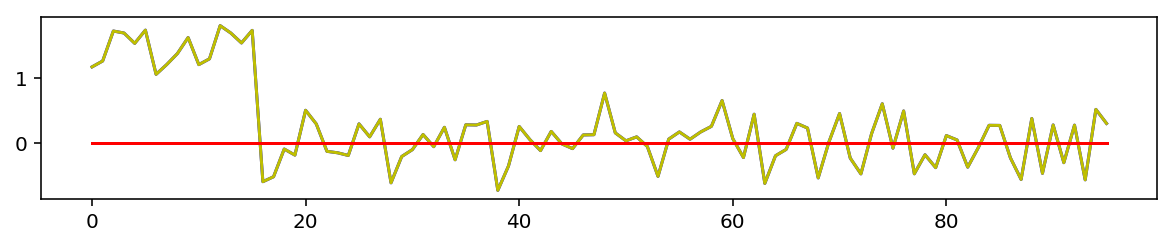

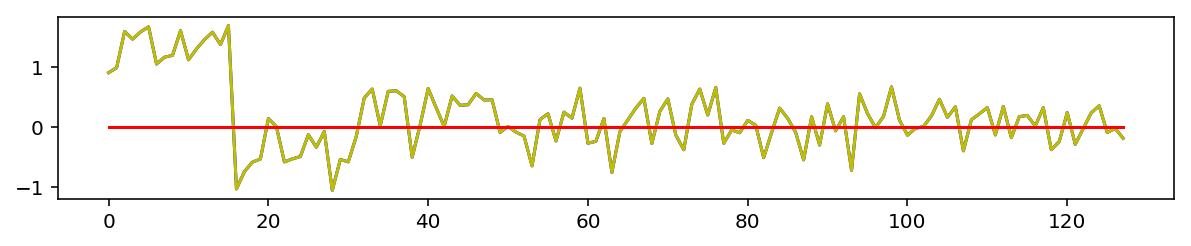

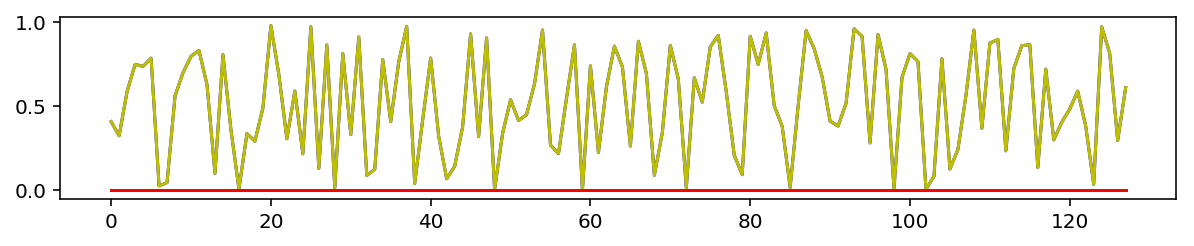

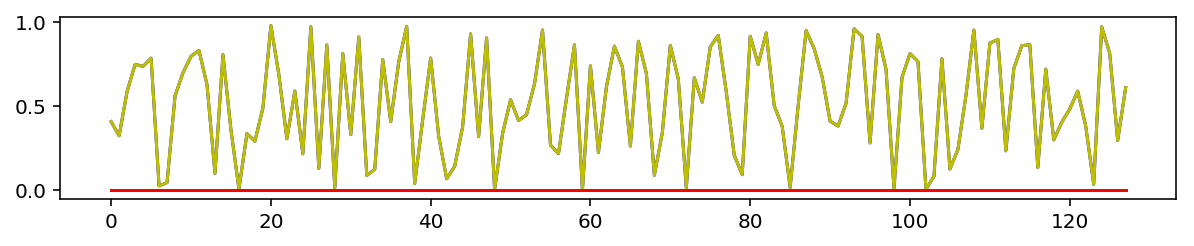

In [ ]:
n_mfcc, n_freq, n_time = 6, 8, 16
x = np.random.rand(n_freq, n_time)
diffs = [
    (
        # librosa dct is the same as scipy dct type=2, truncated to n_mfcc
        np.dot(librosa.filters.dct(n_mfcc, n_freq), x),
        scipy.fftpack.dct(x, axis=0, type=2, norm='ortho')[:n_mfcc],
    ),
    (
        # When n_mfcc=n_freq, librosa dct^{-1} is the same as scipy dct type=3
        np.dot(np.linalg.inv(librosa.filters.dct(n_freq, n_freq)), x),
        scipy.fftpack.dct(x, axis=0, type=3, norm='ortho'),
    ),
    (
        # scipy: type=3 is the (left) inverse of type=2
        scipy.fftpack.dct(scipy.fftpack.dct(x, axis=0, type=2, norm='ortho'), axis=0, type=3, norm='ortho'),
        x,
    ),
    (
        # scipy: type=2 is the (left) inverse of type=3
        scipy.fftpack.dct(scipy.fftpack.dct(x, axis=0, type=3, norm='ortho'), axis=0, type=2, norm='ortho'),
        x,
    ),
]

# %%
# These two graphs should have 1 flat red line and 2 perfectly overlapping squiggly yellow/blue lines
for a, b in diffs:
    plt.plot(a.flatten(), 'b')
    plt.plot(b.flatten(), 'y')
    plt.plot(a.flatten() - b.flatten(), 'r')
    plt.show()

In [ ]:
display(*[
    (
        a.flatten()[:8],
        b.flatten()[:8],
    )
    for a, b in diffs
])

(
  array([1.175, 1.267, 1.73 , 1.699, 1.539, 1.744, 1.061, 1.213]),
  array([1.175, 1.267, 1.73 , 1.699, 1.539, 1.744, 1.061, 1.213]),
)

(
  array([0.906, 0.989, 1.595, 1.467, 1.589, 1.673, 1.05 , 1.166]),
  array([0.906, 0.989, 1.595, 1.467, 1.589, 1.673, 1.05 , 1.166]),
)

(
  array([0.409, 0.325, 0.589, 0.75 , 0.738, 0.787, 0.027, 0.046]),
  array([0.409, 0.325, 0.589, 0.75 , 0.738, 0.787, 0.027, 0.046]),
)

(
  array([0.409, 0.325, 0.589, 0.75 , 0.738, 0.787, 0.027, 0.046]),
  array([0.409, 0.325, 0.589, 0.75 , 0.738, 0.787, 0.027, 0.046]),
)